# Hierarchical Clustering of DNA Synth Compounds

using the non-Cluster features (Fig. 6).

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os.path as op

from typing import Iterable, List

import numpy as np
import pandas as pd

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import seaborn as sns

from IPython.display import HTML, display 

# from tqdm.notebook import tqdm
import ipywidgets as ipyw
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from jupy_tools import plt_style, cpa
from jupy_tools import utils as u
from jupy_tools.utils import info
u.timestamp()

Timestamp: 28-Jun-2022 11:49:11


## Load Data Sets

In [2]:
ds_cpds = u.read_tsv("../input/dna_synth_cpds.tsv")
ds_refs = u.read_tsv("../output/ds_refs_sim_to_clusters.tsv")

read_tsv                           : [      26 /   2 ] ( Well_Id, CpdClass )
read_tsv                           : [    3560 / 601 ] 


In [3]:
ds_cpds = pd.merge(ds_cpds, ds_refs, on="Well_Id", how="inner")
ds_len = len(ds_cpds)
info(ds_cpds)

Shape                              : [      26 / 602 ] 


In [4]:
cl_feat = list(cpa.get_func_cluster_features("DNA_Synth", include_well_id=False).keys())
non_cl_feat = cpa.remaining_features(cl_feat)
len(non_cl_feat)

291

In [5]:
CLUSTER_OPTIONS={
    'SHOW_PLOT'      : True,
    'METRIC'         : 'correlation',  # correlation
    'METHOD'         : 'complete', 
    "LIMIT_VALUES"   : 25,
    'FONT_SIZE'      : 12, 
    'WIDTH'          : 20, # 30
    'HEIGHT'         : ds_len * 66 / 242, 
}
co = CLUSTER_OPTIONS

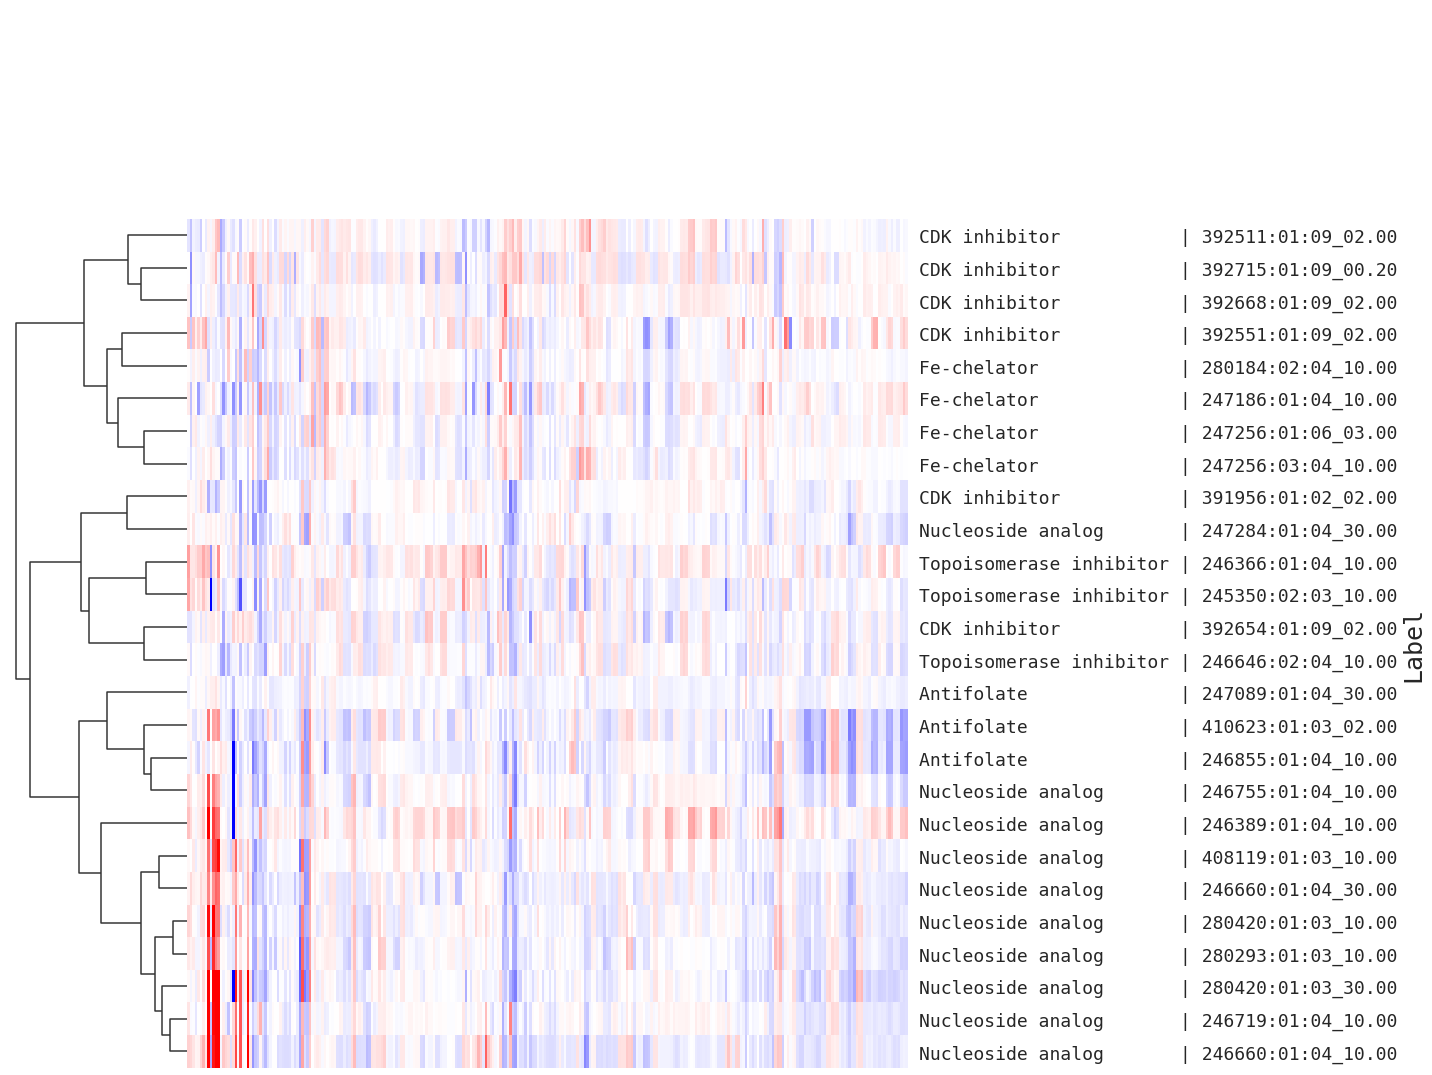

In [6]:
df_org = ds_cpds.copy()
co["FONT_SIZE"] = 18
sns.set_style({'font.family': ['monospace']})
max_label_len = max(df_org["CpdClass"].str.len())
columns = ["Label"]
limit_values = co["LIMIT_VALUES"]
columns.extend(non_cl_feat)
df_data = df_org.copy()
co["HEIGHT"] = len(df_data) * 140 / 242
df_data["Label"] = df_data["CpdClass"].map(lambda x: f"{x:{max_label_len}s}")
df_data["Label"] = df_data["Label"] + " | " + df_data["Well_Id"]
df_sns = df_data[columns].copy()
labels = df_sns["Label"].values
df_sns = df_sns.set_index("Label")
df_sns.clip(-limit_values, limit_values, inplace=True)

if co["SHOW_PLOT"]:
    plt.rcParams['ytick.labelsize'] = co["FONT_SIZE"]
    cm = sns.clustermap(df_sns, metric=co["METRIC"], standard_scale=None, z_score=None, method=co["METHOD"], 
                        col_cluster=False, cbar_pos=None,
                        xticklabels=False, yticklabels=labels,
                        figsize=(co["WIDTH"], co["HEIGHT"]),
                        cmap="bwr", vmin=-15, vmax=15,
                        tree_kws={"linewidth": 1.5, })
    fn = f"plots/hier_cluster_dna_synth_cpds"
    plt.savefig(f"{fn}.png", bbox_inches="tight")
    plt.savefig(f"{fn}.svg", bbox_inches="tight")